In [9]:
%pylab
from itkwidgets import view
import glob
import SimpleITK as sitk
import pandas as pd
import matplotlib.patches as patches
%matplotlib inline

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


# VESSEL 12

In [2]:
a = np.load('/ocean/projects/asc170022p/rohit33/VESSEL12output//ours_0.npy')

In [21]:
# view(np.log(1e-10 + a))
view(a)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [14]:
a1 = np.load('/ocean/projects/asc170022p/rohit33/VESSEL12output/frangi_0.npy')
view(np.log(1e-50 + a1))

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [3]:
# img = sitk.GetArrayFromImage(sitk.ReadImage('/ocean/projects/asc170022p/rohit33/VESSEL12/test/VESSEL12_21.mhd'))
img = sitk.GetArrayFromImage(sitk.ReadImage('/ocean/projects/asc170022p/rohit33/VESSEL12/compressed/test/Scans/VESSEL12_21.mhd'))

In [4]:
view(img)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageSS3; pr…

In [6]:
a = np.load('/ocean/projects/asc170022p/rohit33/VESSEL12output/frangi_0.npy')

In [7]:
view((a > 9e-8).astype(float))

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [5]:
locs = pd.read_csv("/ocean/projects/asc170022p/rohit33/VESSEL12/test/Annotations/VESSEL12_21_Annotations.csv", header=None)
locs = np.array(locs)

In [6]:
locs

array([[114, 120, 155,   0],
       [123, 122, 155,   0],
       [133, 113, 155,   0],
       ...,
       [375, 413, 199,   0],
       [384, 410, 199,   0],
       [401, 397, 199,   0]])

In [11]:
set(locs[:, 2])

{155, 199, 332}

<Figure size 864x864 with 0 Axes>

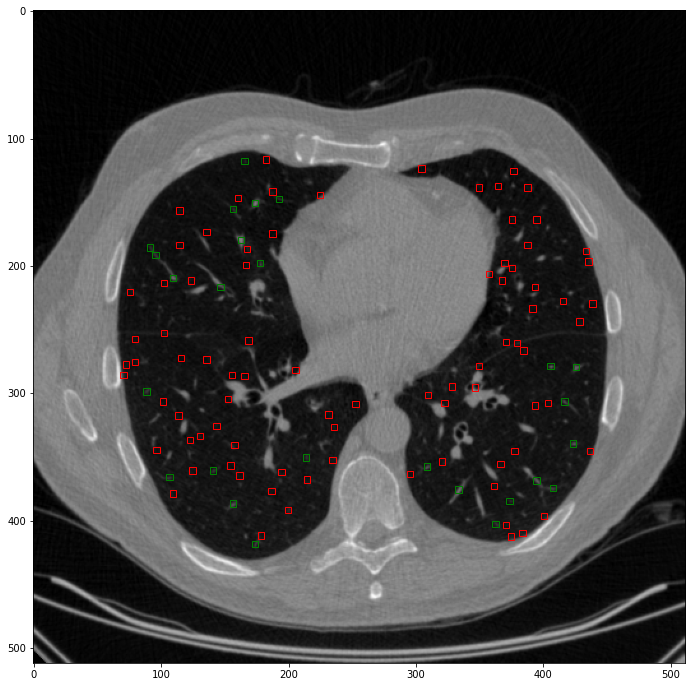

In [14]:
H, W, D = img.shape
z0 = 199
plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img[z0], 'gray')

for x, y, z, lab in locs:
    if z != z0:
        continue
#     rect = plt.Rectangle((200, 0), 10, 10)
#     ax.add_patch(rect)
    if lab == 1:
        rect = plt.Rectangle((x-3, y-3), 5, 5, edgecolor='green', facecolor='none')
    else:
        rect = plt.Rectangle((x-3, y-3), 5, 5, edgecolor='red',  facecolor='none')
    ax.add_patch(rect)

# Get ROC curve in TubeTK

In [10]:
from sklearn import metrics
import seaborn as sns

In [11]:
root = '/ocean/projects/asc170022p/rohit33/TubeTKoutput/'
gtfiles = sorted(glob.glob(root + 'gt*npy'))
hullfiles = sorted(glob.glob(root + 'hull*npy')) 
frfiles = sorted(glob.glob(root + 'frangi*npy'))
ourfiles = sorted(glob.glob(root + 'ours*npy'))
satofiles = sorted(glob.glob(root + 'sato*npy'))
meifiles = sorted(glob.glob(root + 'mei*npy'))

In [12]:
imgid = 1
hull = np.load(hullfiles[imgid])

def modifyhull(out, hull):
    m = out.min()
    out[hull == 0] = m
    return out

In [13]:
print(gtfiles[imgid])
gt = np.load(gtfiles[imgid])
frangi = np.load(frfiles[imgid])
ours = np.load(ourfiles[imgid])
sato = np.load(satofiles[imgid])
mei = np.load(meifiles[imgid])

/ocean/projects/asc170022p/rohit33/TubeTKoutput/gt_1.npy


0.9037359792269682
0.7469859643058
0.8349035632874864
0.9490862907134247


Text(0.5, 1.0, 'ROC curve for TubeTK dataset')

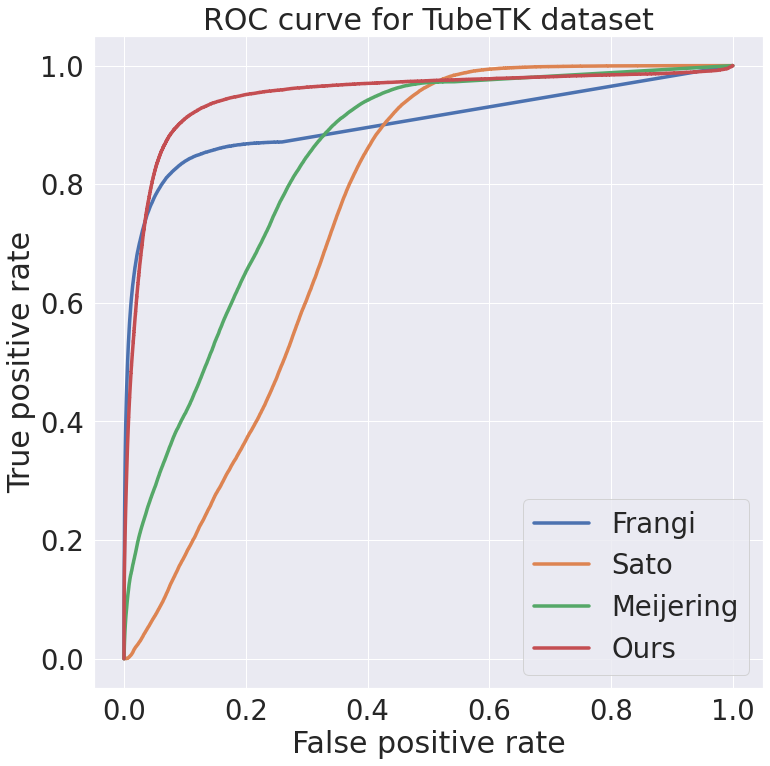

In [14]:
plt.figure(figsize=(12, 12))
sns.set_style("darkgrid")
sns.set(font_scale=2.5, )

for ves in [frangi, sato, mei, ours]:
    fpr, tpr, _ = metrics.roc_curve(gt.reshape(-1), ves.reshape(-1), pos_label=1)
    plt.plot(fpr, tpr, linewidth=3.5)
    print(metrics.auc(fpr, tpr))
plt.legend(['Frangi', 'Sato', 'Meijering', 'Ours'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for TubeTK dataset')

# Get TubeTK  visualizations

In [27]:
# view((np.log(1e-10 + frangi) > -14).astype(float))
view((frangi > 5e-7).astype(float))

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [12]:
view((ours > 1.02).astype(float))

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [13]:
view((gt).astype(float))

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

# Get convex hull of ground truth

In [7]:
from skimage.morphology import convex_hull_image, binary_dilation

In [21]:
hull = gt*0

In [22]:
for i in range(hull.shape[0]):
    gtimg = binary_dilation(gt[i], np.ones((3, 3)))
    gtimg = convex_hull_image(gtimg)
    hull[i] = gtimg


Input image is entirely zero, no valid convex hull. Returning empty image


In [24]:
# Now for other direction
for i in range(hull.shape[1]):
    gtimg = hull[:, i] + 0
    gtimg = convex_hull_image(gtimg)
    hull[:, i] = gtimg

Input image is entirely zero, no valid convex hull. Returning empty image


In [26]:
# Now for other direction
for i in range(hull.shape[2]):
    gtimg = hull[:, :, i] + 0
    gtimg = convex_hull_image(gtimg)
    hull[:, :, i] = gtimg

Input image is entirely zero, no valid convex hull. Returning empty image


In [27]:
view(hull)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageF3; pro…

In [4]:
hull = np.load(hullfiles[1])

In [5]:
view(hull)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageF3; pro…